In [1]:
import numpy as np
import matplotlib.pyplot as plt

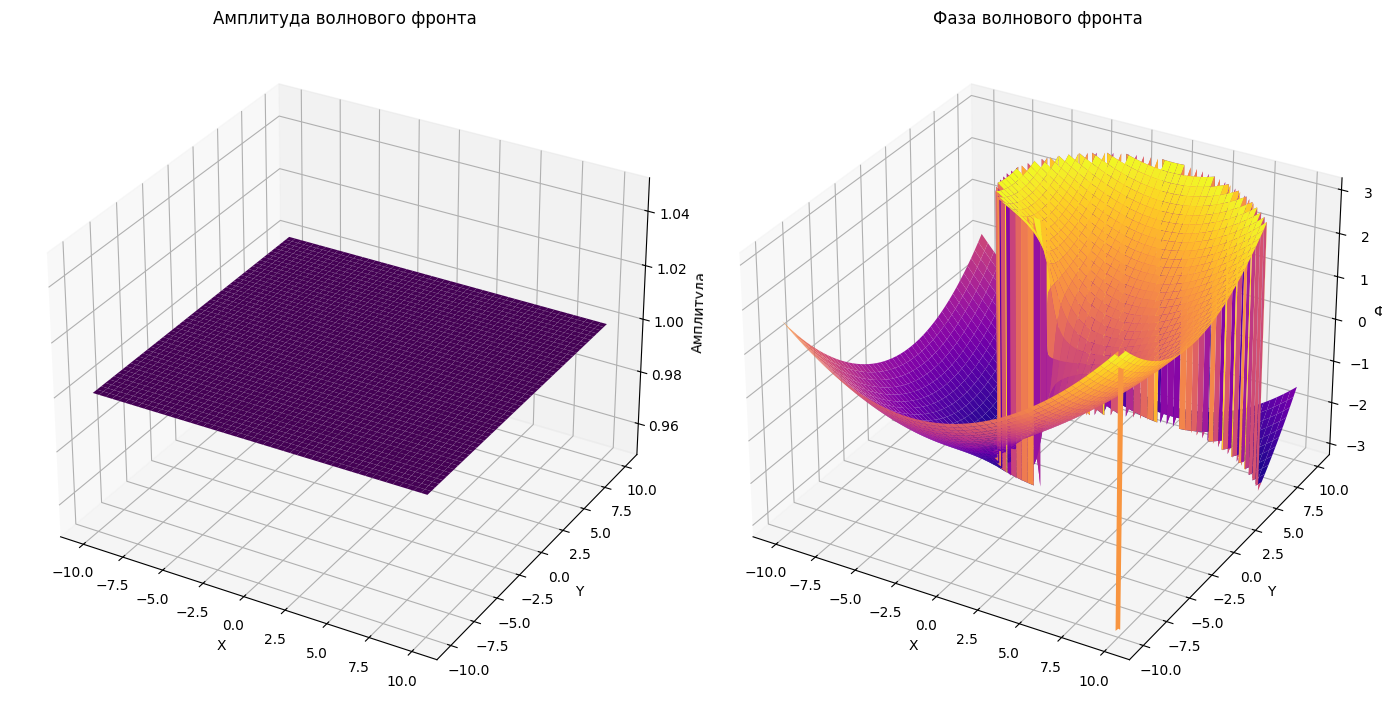

In [2]:
# Определим параметры
N = 1000  # Размер сетки
r_max = 10  # Максимальный радиус
k = 0.02  # Коэффициент для радиуса
alpha = 1  # Коэффициент для угла (больше - больше витков)
A = 1  # Амплитуда

# Сетка координат
x = np.linspace(-r_max, r_max, N)
y = np.linspace(-r_max, r_max, N)
X, Y = np.meshgrid(x, y)

# Вычисляем радиус r и угол theta для каждой точки
R = np.sqrt(X**2 + Y**2)
Theta = np.arctan2(Y, X)

# Волновой фронт с закручивающейся фазой
u = A * np.exp(1j * (k * R**2 + alpha * Theta))

# Вычисляем фазу (угол)
phase = np.angle(u)

# Создаем 3D график для амплитуды
fig = plt.figure(figsize=(14, 7))

# График амплитуды (модуль волнового фронта)
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, np.abs(u), cmap='viridis', edgecolor='none')
ax1.set_title('Амплитуда волнового фронта')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Амплитуда')

# График фазы
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, phase, cmap='plasma', edgecolor='none')
ax2.set_title('Фаза волнового фронта')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Фаза')

# Показать графики
plt.tight_layout()
plt.show()

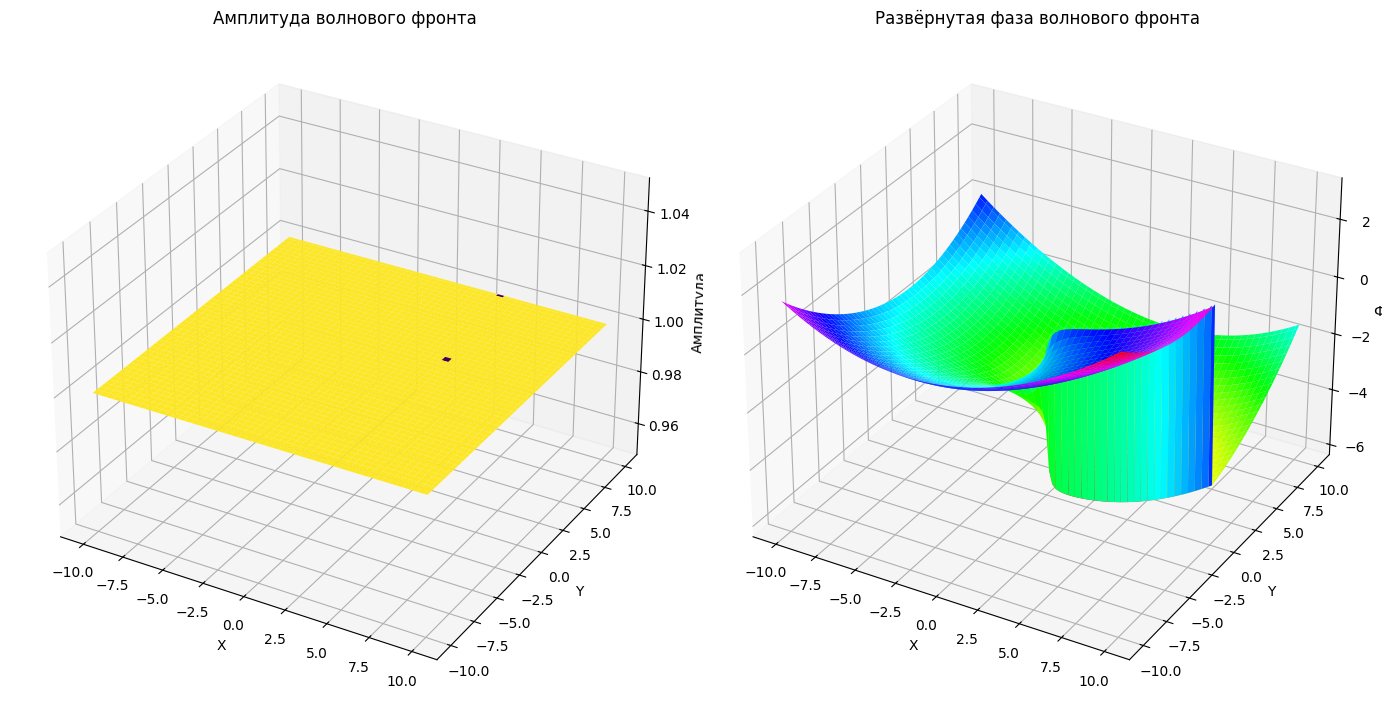

In [3]:
# Определим параметры
N = 100  # Размер сетки
r_max = 10  # Максимальный радиус
k = 0.02  # Коэффициент для радиуса
alpha = 1  # Коэффициент для угла (больше - больше витков)
A = 1  # Амплитуда

# Сетка координат
x = np.linspace(-r_max, r_max, N)
y = np.linspace(-r_max, r_max, N)
X, Y = np.meshgrid(x, y)

# Вычисляем радиус r и угол theta для каждой точки
R = np.sqrt(X**2 + Y**2)
Theta = np.arctan2(Y, X)

# Волновой фронт с закручивающейся фазой
u = A * np.exp(1j * (k * R**2 + alpha * Theta))

# Вычисляем фазу (угол)
phase = np.angle(u)

# Разворачиваем фазу, чтобы избежать скачков
phase_unwrapped = np.unwrap(phase, axis=1)  # Разворачиваем по оси X (горизонтально)

# Создаем 3D график для амплитуды
fig = plt.figure(figsize=(14, 7))

# График амплитуды (модуль волнового фронта)
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, np.abs(u), cmap='viridis', edgecolor='none')
ax1.set_title('Амплитуда волнового фронта')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Амплитуда')

# График фазы с разворачиванием
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, phase_unwrapped, cmap='hsv', edgecolor='none')
ax2.set_title('Развёрнутая фаза волнового фронта')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Фаза')

# Показать графики
plt.tight_layout()
plt.show()

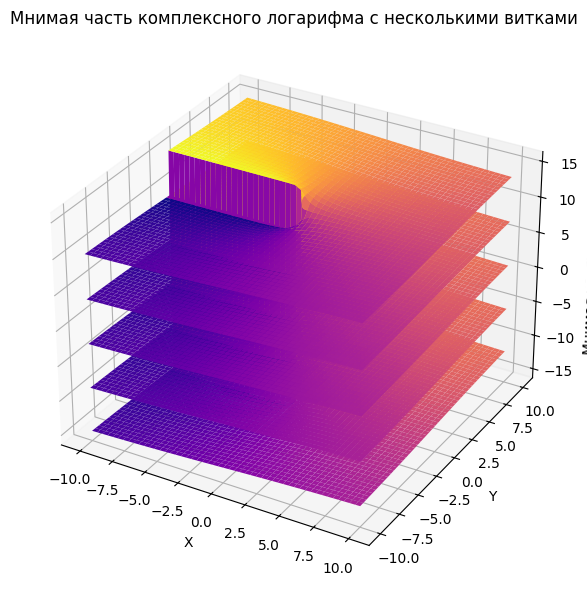

In [4]:
# Определим параметры
N = 500  # Размер сетки
r_max = 10  # Максимальный радиус
num_vitkov = 2  # Количество витков (многозначности)

# Сетка координат
x = np.linspace(-r_max, r_max, N)
y = np.linspace(-r_max, r_max, N)
X, Y = np.meshgrid(x, y)

# Комплексное число Z = X + iY
Z = X + 1j*Y

# Комплексный логарифм: log(z) = log(|z|) + i*arg(z)
log_z = np.log(Z)

# Мнимая часть логарифма (аргумент)
imag_log_z = np.imag(log_z)

# Построение графика с несколькими витками
fig = plt.figure(figsize=(12, 6))

# График мнимой части логарифма
ax = fig.add_subplot(111, projection='3d')
for k in range(-num_vitkov, num_vitkov + 1):  # Для каждого витка
    ax.plot_surface(X, Y, imag_log_z + 2 * np.pi * k, cmap='plasma', edgecolor='none')

ax.set_title('Мнимая часть комплексного логарифма с несколькими витками')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Мнимая часть логарифма')

# Показать график
plt.tight_layout()
plt.show()

In [ ]:
# Интесивность в центре не 0, как она влияет
# поработать с литературой ссылка
#комплекная амплитуда, сами выделить из нее фазы
# 2 метода 
# 20 мая

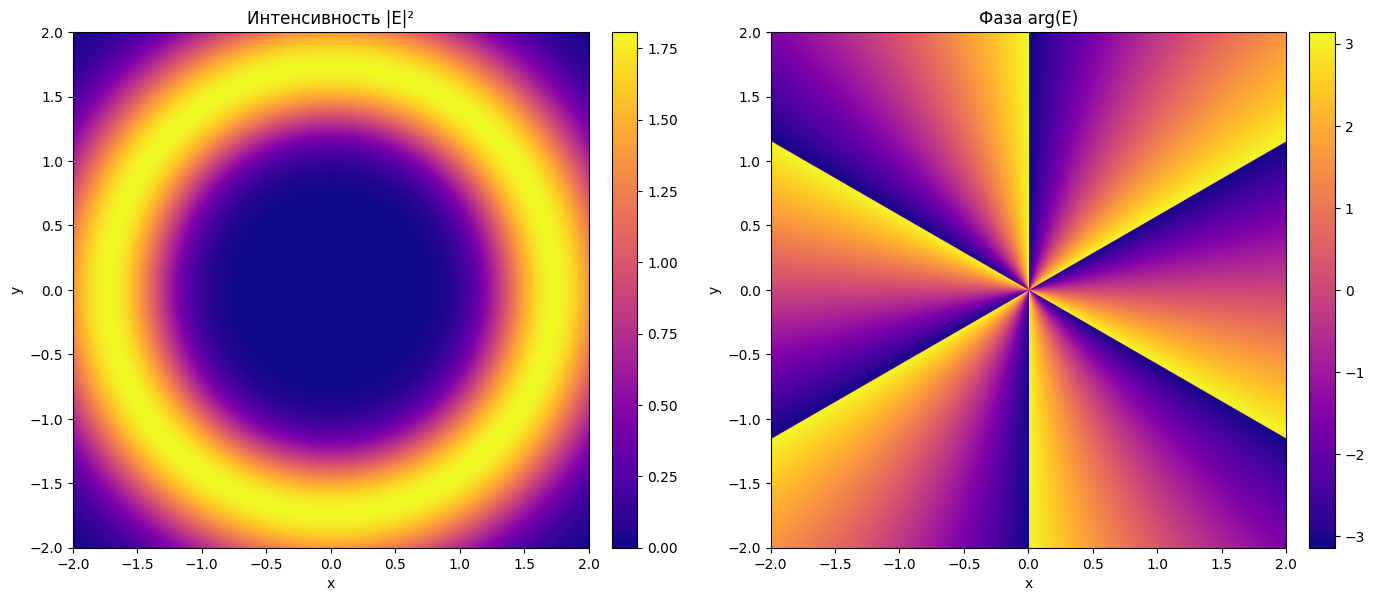

In [24]:
# R^m * e^(-R^2) * e^(i * m * teta)

# Параметры поля
m = 6  # топологический заряд
grid_size = 10000
x = np.linspace(-2, 2, grid_size)
y = np.linspace(-2, 2, grid_size)
X, Y = np.meshgrid(x, y)

# Преобразуем в полярные координаты
R = np.sqrt(X**2 + Y**2)
Theta = np.arctan2(Y, X)

# Волновой фронт с фазовым вихрем
amplitude = R**abs(m) * np.exp(-R**2)
phase = m * Theta
field = amplitude * np.exp(1j * phase)

# Визуализация
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Интенсивность
im0 = axs[0].imshow(np.abs(field)**2, extent=(-2, 2, -2, 2), cmap='plasma')
axs[0].set_title('Интенсивность |E|²')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
fig.colorbar(im0, ax=axs[0], fraction=0.046, pad=0.04)

# Фаза
im1 = axs[1].imshow(np.angle(field), extent=(-2, 2, -2, 2), cmap='plasma')
axs[1].set_title('Фаза arg(E)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
fig.colorbar(im1, ax=axs[1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

In [3]:
def principal_value(x):
    # Приводим значение x в интервал [-pi, pi]
    while x > np.pi:
        x -= 2 * np.pi
    while x <= -np.pi:
        x += 2 * np.pi
    return x

In [5]:
def dfx(z, h):
    z_roll = np.roll(z, -1, axis=1)  # Сдвиг значений влево (с учетом периодичности)
    return (z_roll - z) / h

def dfy(z, h):
    z_roll = np.roll(z, -1, axis=0)  # Сдвиг значений вверх (с учетом периодичности)
    return (z_roll - z) / h

In [4]:
def count_branch_sum(dx, dy, N, h, d1 = 20, d2 = 20, d3 = 20, d4 = 20):

    sum = 0

    # Движение вправо
    for j in range(d1, N - d3):
        sum += principal_value(dx[d2][j]) * h

    # Движение вниз
    for i in range(d2, N - d4):
        sum += principal_value(dy[i][N - d3 - 1]) * h

    # Движение влево
    for j in range(N - d3 - 1, d1, -1):
        sum += -principal_value(dx[N - d4 - 1][j - 1]) * h

    # Движение вверх
    for i in range(N - d4 - 1, d2, -1):
        sum += -principal_value(dy[i - 1][d1]) * h
    return sum

In [25]:
p = np.angle(field)

In [26]:
h = 4 / (grid_size - 1)

In [27]:
dx = dfx(p, h)
dy = dfy(p, h)

In [28]:
count_branch_sum(dx, dy, grid_size, h, 40, 40, 40, 40) / np.pi

np.float64(11.99678469224484)

In [3]:
from method import method_v

In [4]:
if np.angle(field).any() == None:
    print('f')

In [5]:
np.angle(field)

array([[-1.57079633, -1.50957396, -1.44710251, ...,  1.44710251,
         1.50957396,  1.57079633],
       [-1.63201869, -1.57079633, -1.50829859, ...,  1.50829859,
         1.57079633,  1.63201869],
       [-1.69449014, -1.63329407, -1.57079633, ...,  1.57079633,
         1.63329407,  1.69449014],
       ...,
       [ 1.69449014,  1.63329407,  1.57079633, ..., -1.57079633,
        -1.63329407, -1.69449014],
       [ 1.63201869,  1.57079633,  1.50829859, ..., -1.50829859,
        -1.57079633, -1.63201869],
       [ 1.57079633,  1.50957396,  1.44710251, ..., -1.44710251,
        -1.50957396, -1.57079633]])

In [7]:
approx = method_v(np.angle(field), grid_size, 2, 0)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [8]:
approx

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

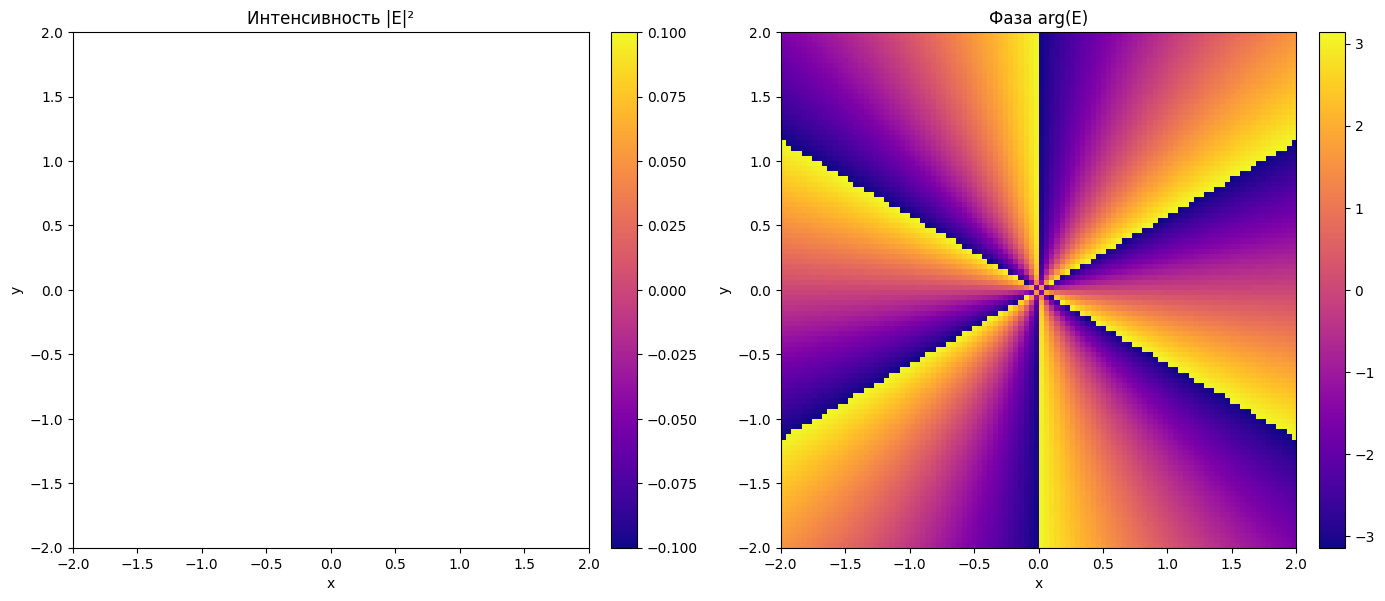

In [9]:
# Визуализация
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Интенсивность
im0 = axs[0].imshow(approx, extent=(-2, 2, -2, 2), cmap='plasma')
axs[0].set_title('Интенсивность |E|²')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
fig.colorbar(im0, ax=axs[0], fraction=0.046, pad=0.04)

# Фаза
im1 = axs[1].imshow(np.angle(field), extent=(-2, 2, -2, 2), cmap='plasma')
axs[1].set_title('Фаза arg(E)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
fig.colorbar(im1, ax=axs[1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

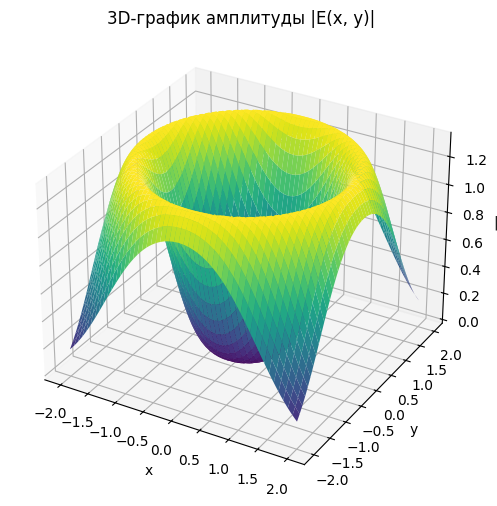

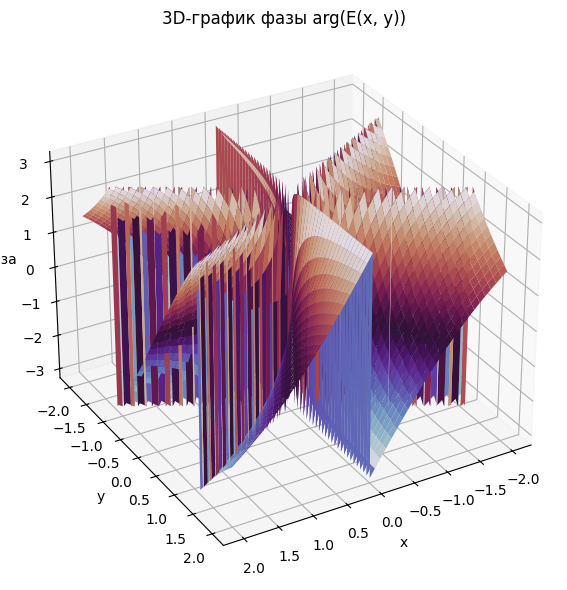

In [34]:
# ---------- 3D ПЛОТ АМПЛИТУДЫ ----------
fig3d_amp = plt.figure(figsize=(8, 6))
ax_amp = fig3d_amp.add_subplot(111, projection='3d')
ax_amp.plot_surface(X, Y, np.abs(field), cmap='viridis', linewidth=0, antialiased=True)

ax_amp.set_title('3D-график амплитуды |E(x, y)|')
ax_amp.set_xlabel('x')
ax_amp.set_ylabel('y')
ax_amp.set_zlabel('|E|')

# ---------- 3D ПЛОТ ФАЗЫ ----------
fig3d_phase = plt.figure(figsize=(8, 6))
ax_phase = fig3d_phase.add_subplot(111, projection='3d')
ax_phase.plot_surface(X, Y, np.angle(field), cmap='twilight', linewidth=0, antialiased=True)

ax_phase.view_init(30, 60)

ax_phase.set_title('3D-график фазы arg(E(x, y))')
ax_phase.set_xlabel('x')
ax_phase.set_ylabel('y')
ax_phase.set_zlabel('Фаза')

plt.tight_layout()
plt.show()